# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Questions 1.1 & 1.2

In [25]:
df = pd.read_csv('./data/college_completion.csv', low_memory=False)
print(df.shape, '\n') # Dimensions: 3798 observations x 63 variables
print(df.columns, '\n') 
print(df.head())

(3798, 63) 

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_afte

Question 1.3

One pattern I notice is that private not-for-profit institutions are overwhelmingly 4-year programs, while only a small portion are 2-year programs. In contrast, public institutions show a higher concentration of 2-year programs compared to 4-year programs. Meanwhile, private for-profit institutions show a more balanced distribution between 2-year and 4-year programs (12.2% vs. 13.9%). 

In [26]:
print(pd.crosstab(df['control'], df['level']), '\n')
print(pd.crosstab(df['control'],df['level'], normalize='all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



Question 1.4

<Axes: xlabel='grad_100_value', ylabel='Count'>

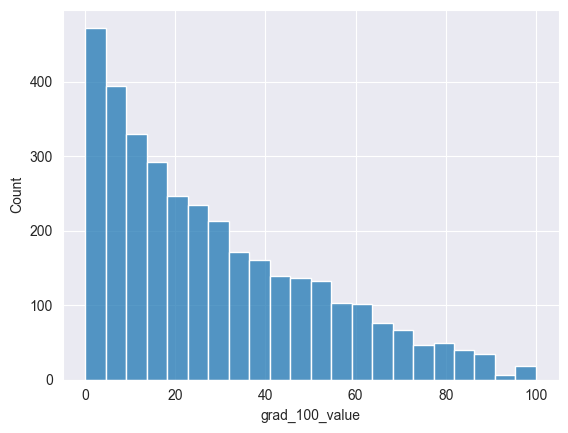

In [27]:
sns.histplot(df['grad_100_value']) # Histogram

<Axes: xlabel='grad_100_value', ylabel='Density'>

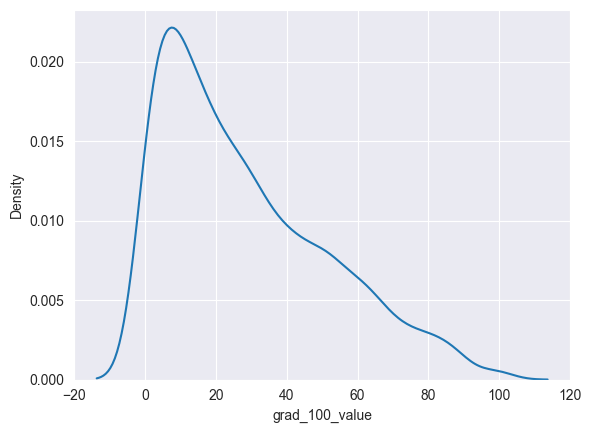

In [28]:
sns.kdeplot(df['grad_100_value']) # Kernel Density Plot

<Axes: ylabel='grad_100_value'>

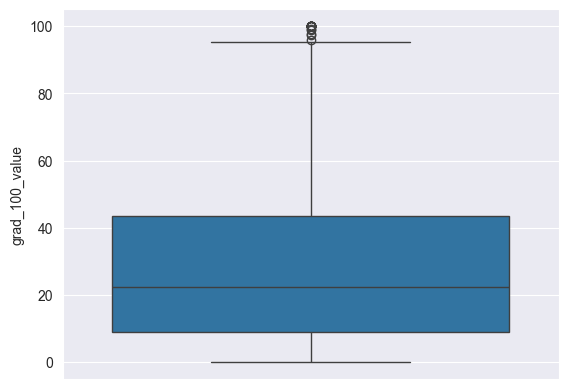

In [29]:
sns.boxplot(df['grad_100_value']) # Boxplot

In [30]:
df['grad_100_value'].describe() # Statistical Description

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

Question 1.5

I can see that public institutions peak sharply near a lower graduation rate. In contrast, private not-for-profit institutions have a broader distribution, with graduation rates spread more widely. Meanwhile, private for-profit institutions display a flatter distribution, with a peak near the lower end, indicating they generally have lower graduation rates.

<Axes: xlabel='grad_100_value', ylabel='Density'>

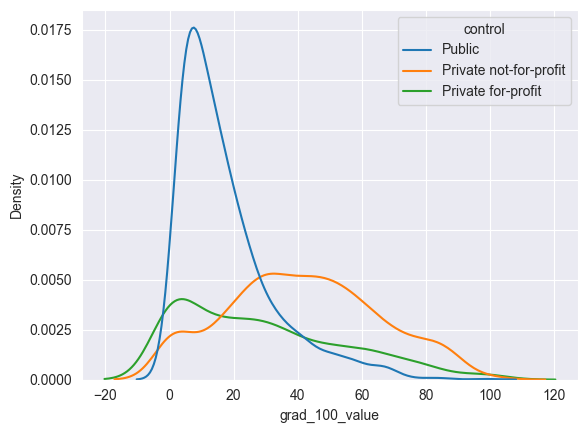

In [31]:
sns.kdeplot(data=df, x='grad_100_value', hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

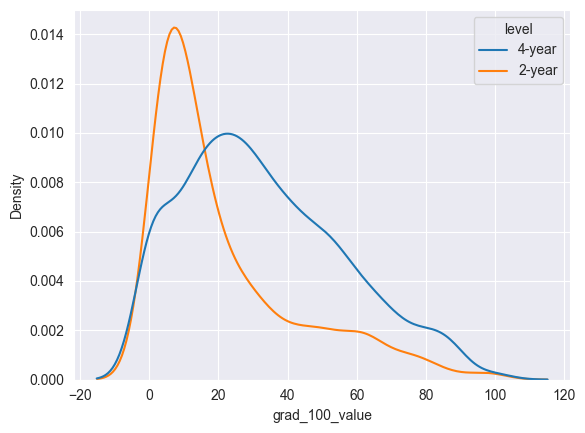

In [32]:
sns.kdeplot(data=df, x='grad_100_value', hue='level')

In [33]:
df.loc[:, ['control', 'grad_100_value']].groupby('control').describe() # Private not-for-profit institutions have the highest graduation rates

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [34]:
df.loc[:, ['level', 'grad_100_value']].groupby('level').describe() # 4-year institutions have the higher graduation rates than 2-year institutions

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

Question 1.6

From the kernel density plot, 4-year, private not-for-profit institutions seem to have the best graduation rates. This is because the distribution for this category is more spread out towards the higher end of the x-axis, indicating higher graduation rate values.

<Axes: xlabel='grad_100_value', ylabel='Density'>

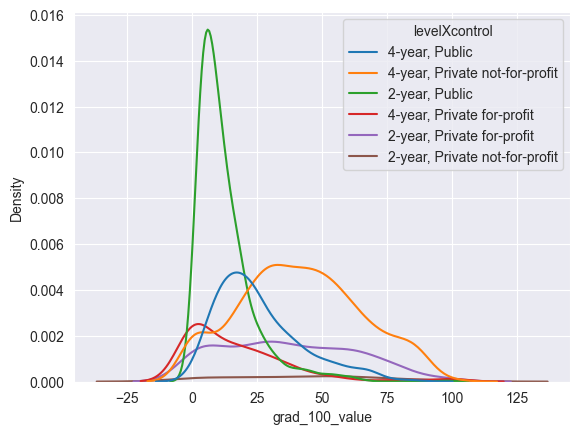

In [35]:
df['levelXcontrol'] = df['level'] + ', ' + df['control']
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol') # 4-year, Private not-for-profit seems to have the best graduation rates

Question 1.7

The shape of the graphs indicate differences in the distribution of aid across the different types of institutions. The 'second mode' corresponds to private not-for-profit institutions, suggesting they have a wider range of aid amounts, often higher than other types. The peak around lower aid values represents public and private for-profit institutions, which typically offer smaller amounts of aid. The variation is not solely explained by the institution level (2-year vs. 4-year), since private not-for-profits include both types and still show a larger distribution of aid.

<Axes: xlabel='aid_value', ylabel='Density'>

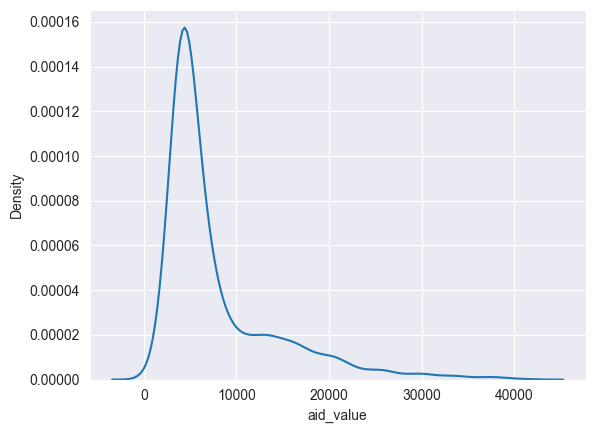

In [41]:
sns.kdeplot(data=df, x='aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

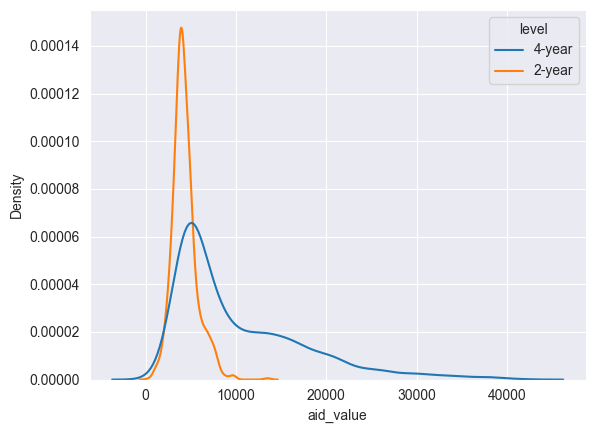

In [37]:
sns.kdeplot(data=df, x='aid_value', hue='level')

<Axes: xlabel='aid_value', ylabel='Density'>

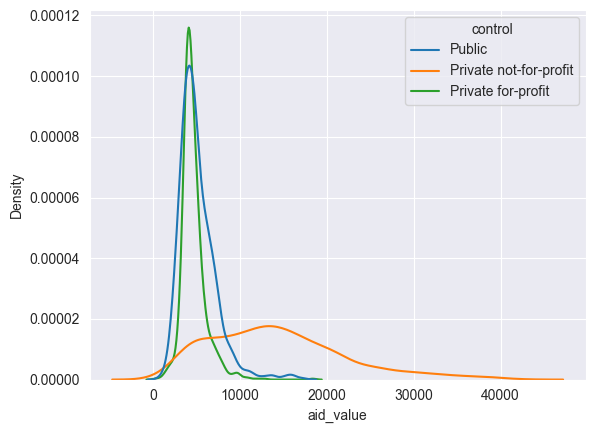

In [38]:
sns.kdeplot(data=df, x='aid_value', hue='control')

In [39]:
df.loc[:, ['control', 'aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [40]:
df.loc[:, ['level', 'aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

Question 1.8

In the first graph, I can see a positive association between financial aid and graduation rates up to around $20,000. However, past this aid amount, the relationship seems to become more scattered, indicating a weaker association between high financial aid and graduation rates.

In the second graph, I can see that 4-year institutions are more spread out and cover a broader range of both financial aid values and graduation rates. In contrast, 2-year institutions are concentrated on the lower end of both financial aid values and graduation rates. 

Private not-for-profit institutions seems to show the clearest association between aid and higher graduation rates. As the amount of aid increases, these institutions generally have higher graduation rates.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

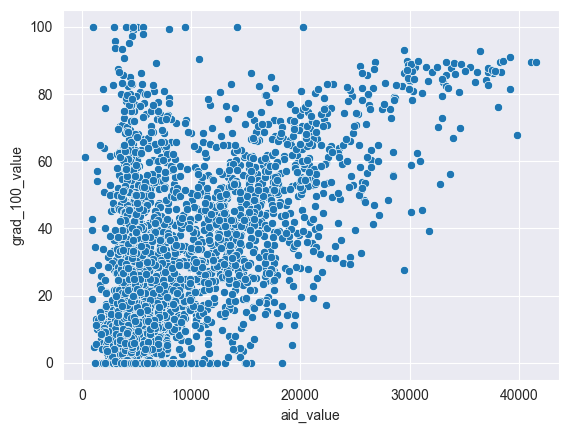

In [42]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

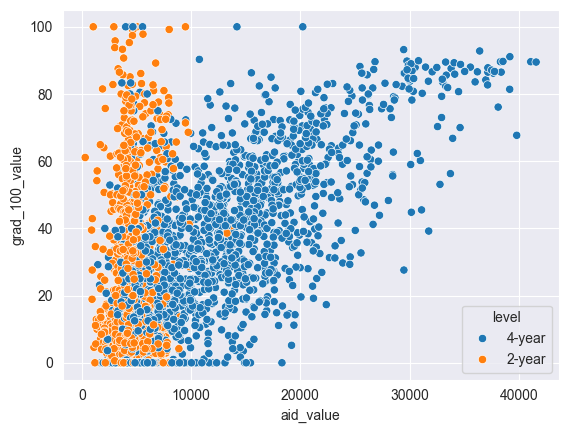

In [43]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

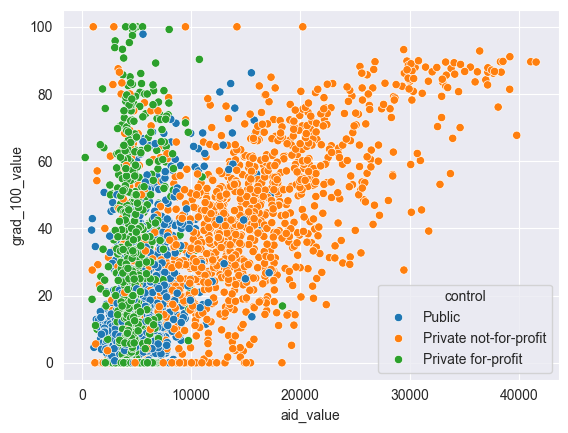

In [44]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

Questions 4.1 & 4.2

The data dictionary is comprehensive and very well-organized. It provides clear definitions for each variable (both categorical and numeric), including all possible codes for each variable. The data dictionary uses the code '.' for Inapplicable/Missing values across all of its categorical variables. Although most variables in the data set are categorical, for the few numeric variables, such as PUF_ID and SURVEYYR, the data dictionary does not appear to specify how missing values are handled.

In [4]:
mdf = pd.read_csv('./data/sfpuf2021_1_fall.csv', low_memory=False) # Medicare Current Beneficiary Survey

Question 4.3

I chose the variables DEM_AGE, DEM_RACE, and HLT_OCHBP to see how the prevalence of hypertension varies across age and race groups among the Medicare population. I chose the variables ADM_H_ACTSTY and ADM_H_SNFSTY because I felt they best indicated the level of healthcare service utilization and wanted to better understand healthcare usage patterns. I found that the data set was already meticulously cleaned, since there were no random or unexpected values, and all the missing variables were accounted for (i.e. nan).

In [5]:
print(mdf['DEM_AGE'].unique(), mdf['DEM_AGE'].dtype, '\n') # Age Group [3, 2, 1]
print(mdf['DEM_RACE'].unique(), mdf['DEM_RACE'].dtype, '\n') # Race Group [1, 2, 3, 4]
print(mdf['HLT_OCHBP'].unique(), mdf['HLT_OCHBP'].dtype, '\n') # High Blood Pressure ['1', '2', 'D', 'R', nan]

print(mdf['ADM_H_ACTSTY'].unique(), mdf['ADM_H_ACTSTY'].dtype, '\n') # Number of Inpatient Stays in Current Year [1, 0, 2, 3, 4]
print(mdf['ADM_H_SNFSTY'].unique(), mdf['ADM_H_SNFSTY'].dtype, '\n') # Number of Skilled Nursing Facility (SNF) Stays in Current Year [0, 1, 2]

[3 2 1] int64 

[1 2 3 4] int64 

['1' '2' 'D' 'R' nan] object 

[1 0 2 3 4] int64 

[0 1 2] int64 



Question 4.4

For the variables I chose, I did not observe any outliers. I believe this is because in the data set, the variables have been meticulously categorized, encoded, and cleaned, so there are no values that lie outside any boundaries that have been prescribed.

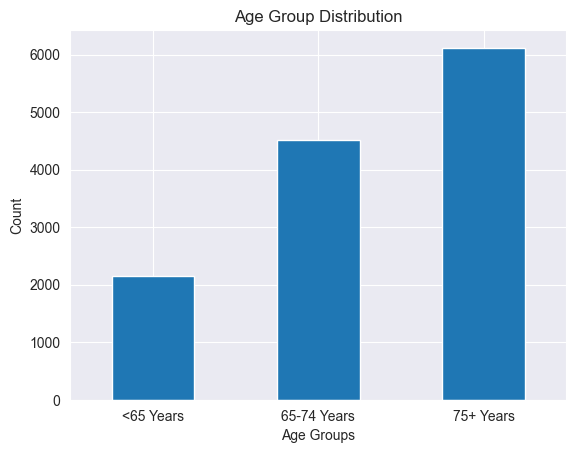

In [6]:
# Age Group Bar Graph
mdf['DEM_AGE'] = mdf['DEM_AGE'].astype('category')
age_counts = mdf['DEM_AGE'].value_counts().sort_index()
age_labels = {
    1: '<65 Years',
    2: '65-74 Years',
    3: '75+ Years'
}
age_counts.plot(kind='bar')
plt.xticks(ticks=range(len(age_labels)), labels=[age_labels[key] for key in age_counts.index], rotation=0)
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

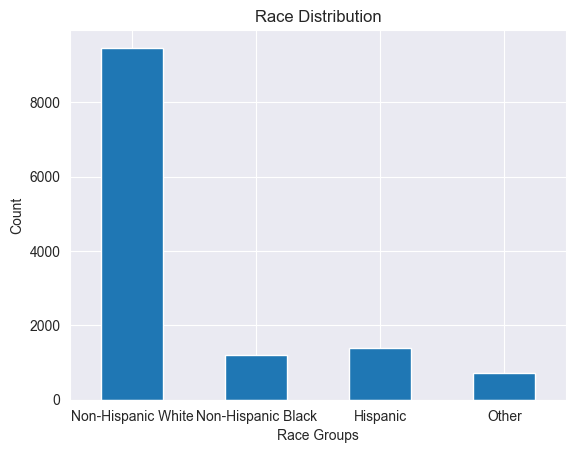

In [20]:
# Race Group Bar Graph
mdf['DEM_RACE'] = mdf['DEM_RACE'].astype('category')
race_counts = mdf['DEM_RACE'].value_counts().sort_index()
race_labels = {
    1: 'Non-Hispanic White',
    2: 'Non-Hispanic Black',
    3: 'Hispanic',
    4: 'Other'
}
race_counts.plot(kind='bar')
plt.xticks(ticks=range(len(race_labels)), labels=[race_labels[key] for key in race_counts.index], rotation=0)
plt.title('Race Distribution')
plt.xlabel('Race Groups')
plt.ylabel('Count')
plt.show()

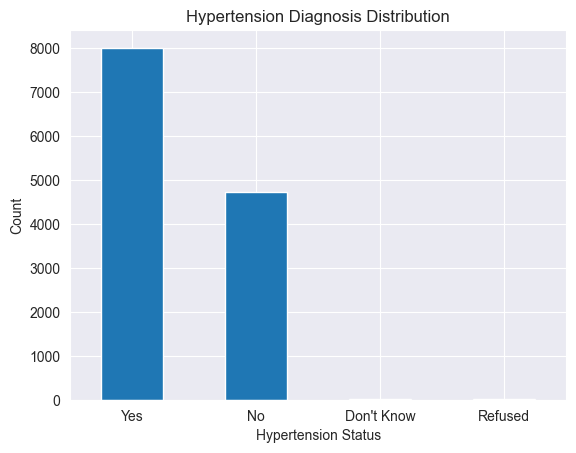

In [7]:
# High Blood Pressure Bar Graph
mdf['HLT_OCHBP'] = mdf['HLT_OCHBP'].astype('category')
hlth_counts = mdf['HLT_OCHBP'].value_counts().sort_index()
hlth_labels = {
    '1': 'Yes',
    '2': 'No',
    'D': 'Don\'t Know',
    'R': 'Refused'
}
hlth_counts.plot(kind='bar')
plt.xticks(ticks=range(len(hlth_labels)), labels=[hlth_labels[key] for key in hlth_counts.index], rotation=0)
plt.title('Hypertension Diagnosis Distribution')
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.show()

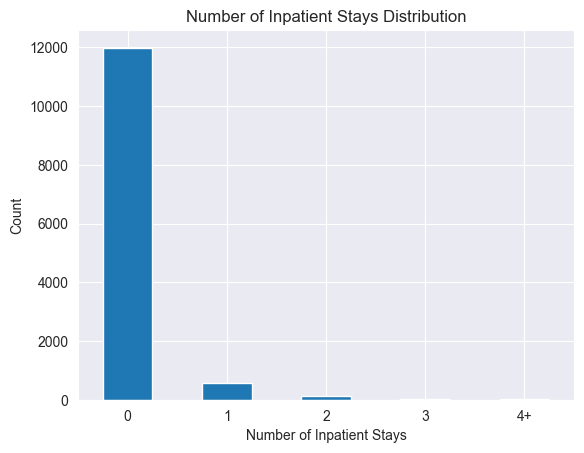

In [18]:
# Inpatient Stays Bar Graph
mdf['ADM_H_ACTSTY'] = mdf['ADM_H_ACTSTY'].astype('category')
actsty_counts = mdf['ADM_H_ACTSTY'].value_counts().sort_index()
actsty_labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4+'
}
actsty_counts.plot(kind='bar')
plt.xticks(ticks=range(len(actsty_labels)), labels=[actsty_labels[key] for key in actsty_counts.index], rotation=0)
plt.title('Number of Inpatient Stays Distribution')
plt.xlabel('Number of Inpatient Stays')
plt.ylabel('Count')
plt.show()

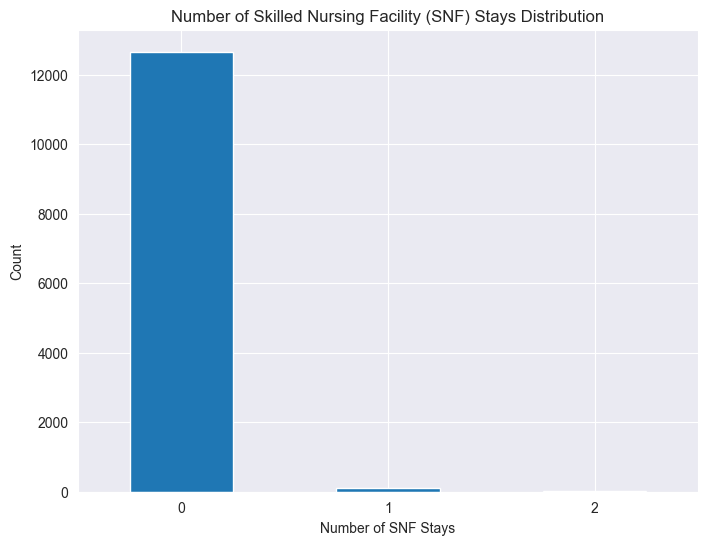

In [19]:
# SNF Stays Bar Graph
mdf['ADM_H_SNFSTY'] = mdf['ADM_H_SNFSTY'].astype('category')
snfsty_counts = mdf['ADM_H_SNFSTY'].value_counts().sort_index()
snfsty_labels = {
    0: '0',
    1: '1',
    2: '2'
}
plt.figure(figsize=(8, 6))
snfsty_counts.plot(kind='bar')
plt.xticks(ticks=range(len(snfsty_labels)), labels=[snfsty_labels[key] for key in snfsty_counts.index], rotation=0)
plt.title('Number of Skilled Nursing Facility (SNF) Stays Distribution')
plt.xlabel('Number of SNF Stays')
plt.ylabel('Count')
plt.show()

Question 4.5

The data set I chose primarily contains categorical variables (e.g. DEM_AGE, DEM_RACE, HLT_OCHBP, ADM_H_ACTSTY, ADM_H_SNFSTY). However, histograms and kernel density plots are used to visualize the distribution of continuous numerical data. That is why I found it challenging to create any meaningful histogram or kernel density plot. In the previous examples, the bar charts were more effective in visualizing the proportion of observations within each category.

Question 4.6

I chose to create a bar chart instead of a scatter plot because all the meaningful variables in my data set are categorical variables, and scatter plots are more suitable for continuous numeric variables. I was interested in understanding how the prevalence of hypertension varies across age groups. Age group <65 years has the smallest count of individuals with hypertension. Age group 65-74 years shows a significant increase of individuals with hypertension. Age group 75+ years has the highest count of individuals with hypertension. This shows that hypertension is most prevalent among older adults and that the likelihood of developing hypertension increases with age.

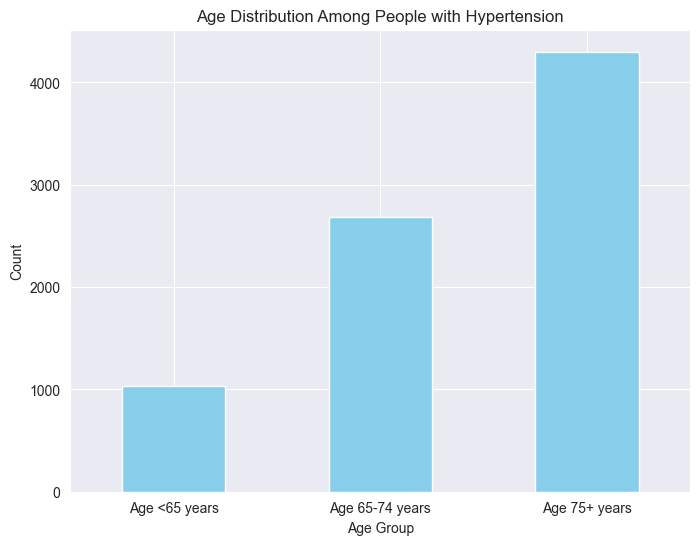

In [17]:
# Relationship Between High Blood Pressure and Age Group
hypertension_df = mdf[mdf['HLT_OCHBP'] == '1']

age_counts = hypertension_df['DEM_AGE'].value_counts().sort_index()

age_labels = {
    1: 'Age <65 years',
    2: 'Age 65-74 years',
    3: 'Age 75+ years'
}

plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.xticks(ticks=range(len(age_labels)), labels=[age_labels[key] for key in age_counts.index], rotation=0)
plt.title('Age Distribution Among People with Hypertension')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Question 4.7

I created a cross tabulation between the DEM_AGE, DEM_RACE, and HLT_OCHBP variables. I see that as age increases, the number of individuals with hypertension (1 in HLT_OCHBP) appears to rise. For instance, in the 75+ age group (DEM_AGE = 3), there are more counts of individuals with hypertension than in the <65 age group (DEM_AGE = 1). I also see that 'non-hispanic whites' (DEM_RACE = 1) shows the highest number of individuals both with and without hypertension across all age groups, with an increase in hypertension with age. Meanwhile, the 'other' race group (DEM_RACE = 4) consistently has the lowest number of individuals across all age and hypertension status categories, still with an increase in hypertension with age.

In [16]:
print(pd.crosstab(index=[mdf['DEM_AGE'], mdf['DEM_RACE']], columns=mdf['HLT_OCHBP'], margins=True))

HLT_OCHBP            1     2   D  R    All
DEM_AGE DEM_RACE                          
1       1          574   741   7  1   1323
        2          252   156   0  1    409
        3          129   140   1  0    270
        4           76    77   0  1    154
2       1         1894  1453   2  1   3350
        2          308    85   0  1    394
        3          311   195   1  0    507
        4          170    84   0  1    255
3       1         3254  1527   6  1   4788
        2          347    59   1  0    407
        3          476   141   1  0    618
        4          222    78   0  0    300
All               8013  4736  19  7  12775
